In [82]:
import requests
from bs4 import BeautifulSoup
import lxml
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [58]:
# url = "https://www.dr.dk/nyheder/service/feeds/politik"
url = "https://www.cbsnews.com/latest/rss/main"
response = requests.get(url)
print(response.text)

<?xml version="1.0" encoding="UTF-8"?>
<rss version="2.0"
        	xmlns:content="http://purl.org/rss/1.0/modules/content/"
	xmlns:wfw="http://wellformedweb.org/CommentAPI/"
	xmlns:dc="http://purl.org/dc/elements/1.1/"
	xmlns:atom="http://www.w3.org/2005/Atom"
	xmlns:sy="http://purl.org/rss/1.0/modules/syndication/"
	xmlns:slash="http://purl.org/rss/1.0/modules/slash/"
    xmlns:s="https://www.cbsnews.com/"

    xmlns:media="http://search.yahoo.com/mrss/"
>
    <channel>
        
        
               

            <title>Home - CBSNews.com</title>
    <link>https://www.cbsnews.com/</link>
    <description>Headlines From CBSNews.com</description>
    <pubDate>Fri, 31 Oct 2025 10:51:02 -0400</pubDate>
    <ttl>5</ttl>
            
                    <item>
                
    <title>This week on &quot;Sunday Morning&quot; (Nov. 2)</title>
    <link>https://www.cbsnews.com/news/this-week-on-sunday-morning-nov-2-2025/</link>
    <description>A look at the features for this week&#039;s

In [59]:
soup = BeautifulSoup(response.content, "xml")

In [69]:
items = soup.find_all("item")

for item in items:
    title = item.title.text
    link = item.link.text
    description = item.description.text if item.description else "No description available"
    date = item.pubDate.text
    print(f" {date} \n{title}\n {link}\n {description}\n")

 Fri, 31 Oct 2025 10:48:57 -0400 
This week on "Sunday Morning" (Nov. 2)
 https://www.cbsnews.com/news/this-week-on-sunday-morning-nov-2-2025/
 A look at the features for this week's broadcast of the Emmy-winning program, hosted by Jane Pauley.

 Fri, 31 Oct 2025 10:45:25 -0400 
FBI says "potential terrorist attack" thwarted in Michigan, multiple arrests
 https://www.cbsnews.com/news/fbi-potential-terrorist-attack-thwarted-michigan-multiple-people-arrested/
 In a social media post​, FBI Director Kash Patel said multiple suspects who were allegedly plotting a violent attack were arrested in Michigan.

 Fri, 31 Oct 2025 10:41:44 -0400 
What are the best ways to cut credit card debt before the holidays? Here's what experts think.
 https://www.cbsnews.com/news/what-are-the-best-ways-to-cut-credit-card-debt-before-the-holidays-heres-what-experts-think/
 Don't let high-rate credit card balances drag you down this holiday season. Here's how to handle that debt instead.

 Fri, 31 Oct 2025 10:3

In [70]:
# load results into a pandas DataFrame

import pandas as pd

data = []
for item in items:
    title = item.title.text
    link = item.link.text
    description = item.description.text if item.description else "No description available"
    date = item.pubDate.text
    data.append({
        "date": date,
        "title": title,
        "link": link,
        "description": description
    })
df = pd.DataFrame(data)
df.head(10)

,date,title,link,description
0,"Fri, 31 Oct 2025 10:48:57 -0400","This week on ""Sunday Morning"" (Nov. 2)",https://www.cbsnews.com/news/this-week-on-sund...,A look at the features for this week's broadca...
1,"Fri, 31 Oct 2025 10:45:25 -0400","FBI says ""potential terrorist attack"" thwarted...",https://www.cbsnews.com/news/fbi-potential-ter...,"In a social media post​, FBI Director Kash Pat..."
2,"Fri, 31 Oct 2025 10:41:44 -0400",What are the best ways to cut credit card debt...,https://www.cbsnews.com/news/what-are-the-best...,Don't let high-rate credit card balances drag ...
3,"Fri, 31 Oct 2025 10:38:00 -0400",Why do we celebrate Halloween? Here's a look a...,https://www.cbsnews.com/video/why-do-we-celebr...,The National Retail Federation says this year'...
4,"Fri, 31 Oct 2025 10:36:13 -0400","China sending 3 taikonauts, and first live mam...",https://www.cbsnews.com/news/china-space-stati...,China is sending a new crew to its Tiangong sp...
5,"Fri, 31 Oct 2025 10:36:00 -0400",How daylight saving time impacts our health,https://www.cbsnews.com/video/how-daylight-sav...,This weekend marks the end of daylight saving ...
6,"Fri, 31 Oct 2025 10:30:00 -0400","Patel says FBI stopped a potential ""terror att...",https://www.cbsnews.com/video/patel-says-fbi-s...,FBI Director Kash Patel announced an operation...
7,"Fri, 31 Oct 2025 10:27:44 -0400",Starbucks CEO Brian Niccol rules out a value m...,https://www.cbsnews.com/news/starbucks-ceo-bri...,Starbucks CEO Brian Niccol doesn't expect AI t...
8,"Fri, 31 Oct 2025 10:25:31 -0400",10/30: CBS Morning News,https://www.cbsnews.com/video/103025-cbs-morni...,"Pres. Trump reduces China tariffs after ""amazi..."
9,"Fri, 31 Oct 2025 10:24:24 -0400",IAEA warns latest Russian strikes jeopardized ...,https://www.cbsnews.com/news/russia-ukraine-wa...,"Ukraine accuses Russia of ""systematic energy t..."


In [71]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kessorchao/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [72]:
# analyze sentiment for each news title and description
df['title_sentiment'] = df['title'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['description_sentiment'] = df['description'].apply(lambda x: sid.polarity_scores(x)['compound'])

df.head(10)

,date,title,link,description,title_sentiment,description_sentiment
0,"Fri, 31 Oct 2025 10:48:57 -0400","This week on ""Sunday Morning"" (Nov. 2)",https://www.cbsnews.com/news/this-week-on-sund...,A look at the features for this week's broadca...,0.0000,0.0000
1,"Fri, 31 Oct 2025 10:45:25 -0400","FBI says ""potential terrorist attack"" thwarted...",https://www.cbsnews.com/news/fbi-potential-ter...,"In a social media post​, FBI Director Kash Pat...",-0.8957,-0.9100
2,"Fri, 31 Oct 2025 10:41:44 -0400",What are the best ways to cut credit card debt...,https://www.cbsnews.com/news/what-are-the-best...,Don't let high-rate credit card balances drag ...,0.7003,-0.3525
3,"Fri, 31 Oct 2025 10:38:00 -0400",Why do we celebrate Halloween? Here's a look a...,https://www.cbsnews.com/video/why-do-we-celebr...,The National Retail Federation says this year'...,0.5719,0.3818
4,"Fri, 31 Oct 2025 10:36:13 -0400","China sending 3 taikonauts, and first live mam...",https://www.cbsnews.com/news/china-space-stati...,China is sending a new crew to its Tiangong sp...,0.0000,0.0000
5,"Fri, 31 Oct 2025 10:36:00 -0400",How daylight saving time impacts our health,https://www.cbsnews.com/video/how-daylight-sav...,This weekend marks the end of daylight saving ...,0.0000,0.3400
6,"Fri, 31 Oct 2025 10:30:00 -0400","Patel says FBI stopped a potential ""terror att...",https://www.cbsnews.com/video/patel-says-fbi-s...,FBI Director Kash Patel announced an operation...,-0.8126,-0.8360
7,"Fri, 31 Oct 2025 10:27:44 -0400",Starbucks CEO Brian Niccol rules out a value m...,https://www.cbsnews.com/news/starbucks-ceo-bri...,Starbucks CEO Brian Niccol doesn't expect AI t...,0.3400,0.4215
8,"Fri, 31 Oct 2025 10:25:31 -0400",10/30: CBS Morning News,https://www.cbsnews.com/video/103025-cbs-morni...,"Pres. Trump reduces China tariffs after ""amazi...",0.0000,0.7964
9,"Fri, 31 Oct 2025 10:24:24 -0400",IAEA warns latest Russian strikes jeopardized ...,https://www.cbsnews.com/news/russia-ukraine-wa...,"Ukraine accuses Russia of ""systematic energy t...",-0.4404,-0.4019


In [73]:
df['Score'] = ["Positive" if x > 0 else "Negative" if x < 0 else "Neutral" for x in df['title_sentiment']]
df.head(10)

,date,title,link,description,title_sentiment,description_sentiment,Score
0,"Fri, 31 Oct 2025 10:48:57 -0400","This week on ""Sunday Morning"" (Nov. 2)",https://www.cbsnews.com/news/this-week-on-sund...,A look at the features for this week's broadca...,0.0000,0.0000,Neutral
1,"Fri, 31 Oct 2025 10:45:25 -0400","FBI says ""potential terrorist attack"" thwarted...",https://www.cbsnews.com/news/fbi-potential-ter...,"In a social media post​, FBI Director Kash Pat...",-0.8957,-0.9100,Negative
2,"Fri, 31 Oct 2025 10:41:44 -0400",What are the best ways to cut credit card debt...,https://www.cbsnews.com/news/what-are-the-best...,Don't let high-rate credit card balances drag ...,0.7003,-0.3525,Positive
3,"Fri, 31 Oct 2025 10:38:00 -0400",Why do we celebrate Halloween? Here's a look a...,https://www.cbsnews.com/video/why-do-we-celebr...,The National Retail Federation says this year'...,0.5719,0.3818,Positive
4,"Fri, 31 Oct 2025 10:36:13 -0400","China sending 3 taikonauts, and first live mam...",https://www.cbsnews.com/news/china-space-stati...,China is sending a new crew to its Tiangong sp...,0.0000,0.0000,Neutral
5,"Fri, 31 Oct 2025 10:36:00 -0400",How daylight saving time impacts our health,https://www.cbsnews.com/video/how-daylight-sav...,This weekend marks the end of daylight saving ...,0.0000,0.3400,Neutral
6,"Fri, 31 Oct 2025 10:30:00 -0400","Patel says FBI stopped a potential ""terror att...",https://www.cbsnews.com/video/patel-says-fbi-s...,FBI Director Kash Patel announced an operation...,-0.8126,-0.8360,Negative
7,"Fri, 31 Oct 2025 10:27:44 -0400",Starbucks CEO Brian Niccol rules out a value m...,https://www.cbsnews.com/news/starbucks-ceo-bri...,Starbucks CEO Brian Niccol doesn't expect AI t...,0.3400,0.4215,Positive
8,"Fri, 31 Oct 2025 10:25:31 -0400",10/30: CBS Morning News,https://www.cbsnews.com/video/103025-cbs-morni...,"Pres. Trump reduces China tariffs after ""amazi...",0.0000,0.7964,Neutral
9,"Fri, 31 Oct 2025 10:24:24 -0400",IAEA warns latest Russian strikes jeopardized ...,https://www.cbsnews.com/news/russia-ukraine-wa...,"Ukraine accuses Russia of ""systematic energy t...",-0.4404,-0.4019,Negative


In [74]:
df['Score'].value_counts()

Score
Neutral     12
Negative     9
Positive     9
Name: count, dtype: int64

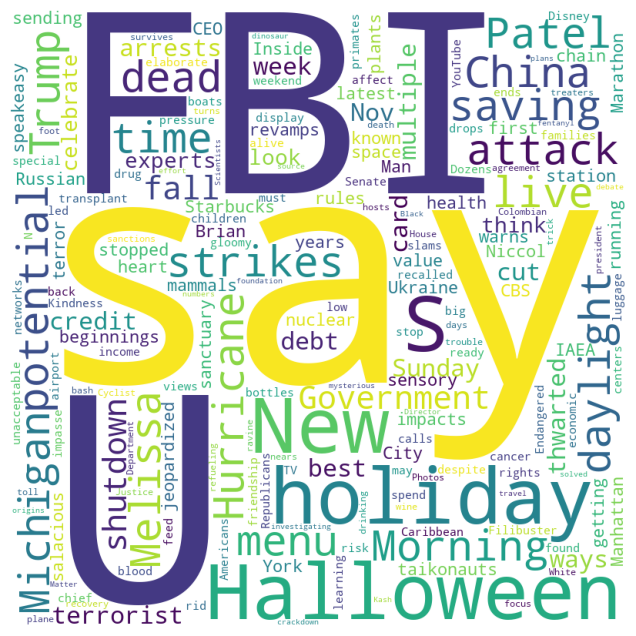

In [83]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(df['title'].str.cat(sep=' '))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()